# Introduction

Context: Train a linear regressor to predict the weight of a person based on their gender (m/f) and their height.

## Goal
- Understand why the linear regressor is an interpretable model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, tree
from sklearn.model_selection import train_test_split

In [2]:
# Kaggle dataset (experiment purposes, might be not accurate depending on demography)
raw_df = pd.read_csv("../dataset/weight-height.csv")
raw_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


#### to do preprocessing
- have columns in lowercase 
- convert height in inches to cm
- convert weight in pound to kg
- Treat gender column as a binary column named female with value 1 if female, 0 if male

## Preprocessing 

In [9]:
INCH_TO_CM = 2.54
POUND_TO_KG = 0.45359237

df = pd.DataFrame()
df["female"] = (raw_df.Gender == "Female").astype(int)
df["height"] = raw_df.Height * INCH_TO_CM
df["weight"] = raw_df.Weight * POUND_TO_KG

## Create train and test set

In [10]:
feature_cols = ["female", "height"]
pred_col = ["weight"]

X = df[feature_cols]
y = df[pred_col]

In [11]:
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size, random_state=2)

## Train linear regressor

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [157]:
lin_reg.score(X,y)

0.9027461220227289

In [156]:
w0 = lin_reg.intercept_[0]
w1, w2 = lin_reg.coef_[0]

## Visualize the test set + prediction

### Split test set into male / female to plot it in 2D

In [163]:
# test set
X_test_female = X_test.loc[X_test.female == 1]["height"]
y_test_female = y_test.loc[X_test_female.index]["weight"]

X_test_male = X_test.loc[X_test.female == 0]["height"]
y_test_male = y_test.loc[X_test_male.index]["weight"]

In [172]:
# predictions
synthetic_heights = np.array([140, 210]) # only need 2 points to plot a line
y_pred_male = w0 + w1 * 0 + w2 * synthetic_heights
y_pred_female = w0 + w1 * 1 + w2 * synthetic_heights

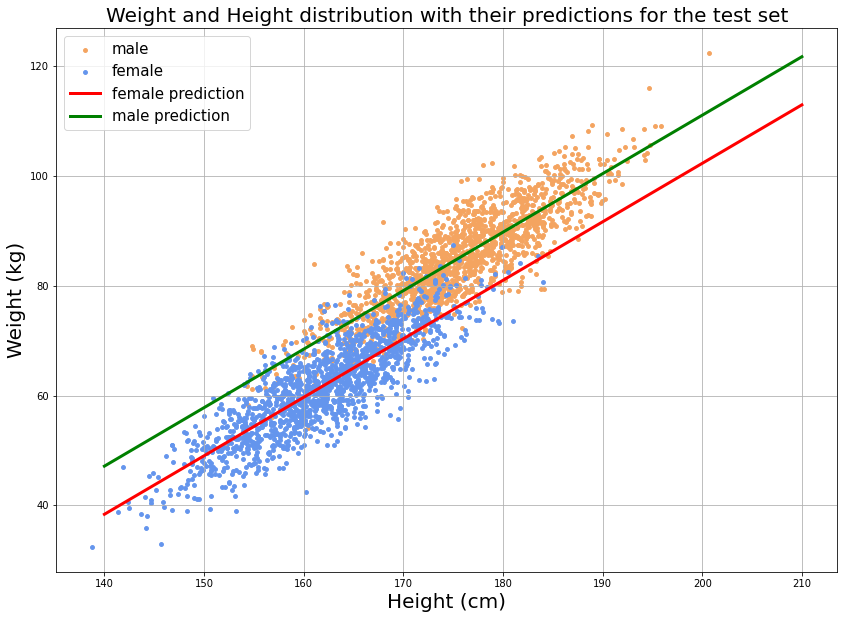

In [173]:
LABEL_FONT_SIZE = 20
DOT_SIZE = 15
LINE_WIDTH = 3

plt.figure(figsize=(14,10))

plt.title("Weight and Height distribution with their predictions for the test set", size=LABEL_FONT_SIZE)
plt.xlabel("Height (cm)", size=LABEL_FONT_SIZE)
plt.ylabel("Weight (kg)", size=LABEL_FONT_SIZE)

plt.scatter(X_test_male, y_test_male.values, color='sandybrown', label="male", s=DOT_SIZE)
plt.scatter(X_test_female, y_test_female.values, color='cornflowerblue', label="female", s=DOT_SIZE)

plt.plot(synthetic_heights, y_pred_female, color='red', label="female prediction", linewidth=LINE_WIDTH) 
plt.plot(synthetic_heights, y_pred_male, color='green', label="male prediction", linewidth=LINE_WIDTH) 

# # for fun (optional)
# my_height = 190 # cm
# my_weight = 84 # kg
# plt.plot(my_height, my_weight, color="magenta", marker="D", label="my weight")

plt.legend(prop={"size": 15})
plt.grid(True)
plt.show()

# Conclusion



- Linear models like the linear regression are simple to train and to explain 
    - The contribution to the final prediction from each feature is clear.
- By increasing the value of each feature, I know exactly how the model will behave. It also makes sense (taller people are heavier, male are on average heavier.)
- This is an interpretable model